# Phase 1 Project: Ebay Perfume Analysis
#### Authored by Trinity Gahagen

## Objective
In this analysis, we will be exploring and analyzing different perfumes sold on ebay to research competition across different criteria.

*Dataset used*:

https://www.kaggle.com/datasets/kanchana1990/perfume-e-commerce-dataset-2024

*External References:*
- https://medium.com/@charlesmanimbo/the-difference-between-perfume-cologne-eau-de-toilette-and-more-34ac21281226
- https://www.ebay.com/

## Dataset Overview

This dataset consisted of 2 CSV files, one with data pertaining to men's perfumes, and another pertaining to women's. The columns included in each file are:
- `brand` : The brand of the perfume
- `title` : The title of the ebay listing
- `type` : The type of perfume being sold (eau de parfum, eau de toilette, etc.)
- `price` : The price that the perfume is listed as
- `priceWithCurrency` : A text version of the price column, including the currency
- `available` : The number of products available in stock
- `availableText` : The information that ebay provides about availability
- `sold` : The number of products already sold
- `lastUpdated` : The date that the listing was last updated
- `itemLocation` : A list of locations where the item can ship from

The first thing to do is to import the proper libraries and set parameters for the plots.

In [146]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
from scipy import stats

# Set parameters for plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'light'

purple_colors = ['#29004a', '#350061', '#3f0073', '#4a0087', '#6200b3', '#6200b3', '#7d00e3', '#8b00fc', '#9717ff', '#a02bff', '#ac47ff', '#bc6bff', '#c782ff', '#d29cff', '#daadff', '#e0baff']
red_colors = ['#6F1400', '#6F1400', '#A51D00', '#BB2100', '#D02500', '#E52800', '#F12B00', '#FF2D00', '#FF3A0F', '#FF4A23', '#FF5834', '#FF6442', '#FF7051', '#FF8166', '#FF8A71', '#FF937C']
blue_colors = ['#01005B', '#020073', '#020088', '#02009C', '#0300B4', '#0300CD', '#0300E2', '#0400F5', '#0400FF', '#1713FF', '#2C28FF', '#403DFF', '#524FFF', '#6361FF', '#7573FF', '#8381FF']

Next, we read in the data and view it to get a sense of the formatting and content.

In [147]:
mens_perfume = pd.read_csv('ebay_mens_perfume.csv')
womens_perfume = pd.read_csv('ebay_womens_perfume.csv')

In [148]:
mens_perfume.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States"
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada"
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States"
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States"
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States"


In [149]:
womens_perfume.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Eau de Parfum,43.99,US $43.99/ea,2.0,2 available / 393 sold,393.0,"May 23, 2024 10:43:50 PDT","Thomasville, Alabama, United States"
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Eau de Parfum,79.99,US $79.99,5.0,5 available / 40 sold,40.0,"May 24, 2024 00:15:48 PDT","New Jersey, Hong Kong"
2,PRADA,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Eau de Parfum,59.99,US $59.99,10.0,More than 10 available / 35 sold,35.0,"May 14, 2024 20:54:25 PDT","Orange, New Jersey, United States"
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Eau de Parfum,59.99,US $59.99/ea,10.0,More than 10 available / 9 sold,9.0,"May 23, 2024 01:23:05 PDT","USA, New Jersey, Hong Kong"
4,Khadlaj,Shiyaaka for Men EDP Spray 100ML (3.4 FL.OZ) B...,Eau de Parfum,29.99,US $29.99/ea,10.0,More than 10 available,NaN,NaN,"Little Ferry, New Jersey, United States"


## Data Cleaning
The cells containing code that pertain to cleaning the data, including text processing, null value dropping and imputing, and feature engineering are in the following section.

First, I created columns for each table indicating what sex the perfume is intended for, including those that specify unisex.

In [150]:
mens_perfume['forMen'] = 1
womens_perfume['forWomen'] = 1
womens_perfume[['unisex','forMen']] = 0
mens_perfume[['unisex', 'forWomen']] = 0

print(mens_perfume.columns)
print(womens_perfume.columns)

Index(['brand', 'title', 'type', 'price', 'priceWithCurrency', 'available',
       'availableText', 'sold', 'lastUpdated', 'itemLocation', 'forMen',
       'unisex', 'forWomen'],
      dtype='object')
Index(['brand', 'title', 'type', 'price', 'priceWithCurrency', 'available',
       'availableText', 'sold', 'lastUpdated', 'itemLocation', 'forWomen',
       'unisex', 'forMen'],
      dtype='object')


Then I combined these two tables by concatenating them to make one singular DataFrame.

In [151]:
perfumes = pd.concat([mens_perfume, womens_perfume], ignore_index=True)

In [152]:
perfumes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1998 non-null   object 
 1   title              2000 non-null   object 
 2   type               1995 non-null   object 
 3   price              2000 non-null   float64
 4   priceWithCurrency  2000 non-null   object 
 5   available          1758 non-null   float64
 6   availableText      1989 non-null   object 
 7   sold               1978 non-null   float64
 8   lastUpdated        1874 non-null   object 
 9   itemLocation       2000 non-null   object 
 10  forMen             2000 non-null   int64  
 11  unisex             2000 non-null   int64  
 12  forWomen           2000 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 203.2+ KB


There are very few null values based off brand and type, so dropping them will be inconsequential.

In [153]:
perfumes.dropna(subset=['brand', 'type'], inplace=True)

Here I created columns to indicate whether the perfume was intended for men, women, or unisex.

In [154]:
# Create masks to filter for each gender
UNISEX_MASK = perfumes['title'].str.lower().str.contains('unisex')
WOMEN_MASK = perfumes['title'].str.lower().str.contains('for women')
MEN_MASK = perfumes['title'].str.lower().str.contains('for men')

# Filter using np.where(), changing the values where the condition is true, otherwise leave it as it is
perfumes['unisex'] = np.where(UNISEX_MASK, 1, perfumes['unisex'])
perfumes['forWomen'] = np.where(WOMEN_MASK, 1, perfumes['forWomen'])
perfumes['forMen'] = np.where(MEN_MASK, 1, perfumes['forMen'])

# Make sure that there are no rows with 1s in more than one of these columns
for col in ['forWomen', 'forMen']:
    perfumes[col] = np.where(perfumes['unisex'] == 1, 0, perfumes[col])

### Text Preprocessing
The following section of code was preprocessing the text in the `type`, `location`, and `brand` columms to make each of them more consistently formatted. One hot encoding was used to indicate location from which each perfume shipped.

In [155]:
perfumes['type'].unique()

array(['Eau de Parfum', 'Eau de Toilette', 'Fragrances', 'Perfume', '/',
       'PARFUM', 'Parfum', 'Concentrated Uncut Pure Body Oil',
       'LE PARFUM', 'Eau De Parfum', 'Unscented', 'Eau de Cologne',
       '~ THE ONE EAU DE PARFUM SPRAY ~', 'EXTRAIT DE PARFUM',
       'Eau De Toilette', 'Eau De Parfum Intense', 'Pheromone',
       'Aftershave', 'Fragrance & Perfume', 'Eau de Perfume',
       'Jo Malone Cologne Intense Spray', 'Y', 'Gift Sets',
       'Fragrance Rolling Ball', 'Body Spray', 'Eau de toilette',
       'Eau de Toillette',
       'Eau De Toilette, Eau De Parfum, Eau De Parfum Intense', 'Cologne',
       'le parfum', 'Eau de Toilette Intense',
       'Eau de Cologne Spray, Cologne Spray', 'Extrait De Parfum',
       'Fine Cologne', 'Does not apply', 'EDT', 'Extrait de Parfum',
       'Editions Parfums', 'DIOR HOMME COLOGNE', 'Deodorant', 'De Nuit',
       'Eau de Toilette, Cologne Spray', 'Parfum Intense',
       'Eau de Parfum Intense', 'cologne', 'EAU DE COLOGNE SPRAY

In [156]:
# Find phrases or words to match on
eau_de_toilette = "(eau){1} de toi.*|edt"
eau_de_parfum = "(eau){1} de parfum|edp|eau de perfume"
mist = "mist"
cologne = "cologne|edc"
oil = "(?!t)oil"
fragrance = "fragrance"
roll_on = "roll"
lotion = "lotion|moisturizer|cream"
deodorant = "deodorant"
sets = "set|pc"
perfume = "perfume|^parfum"

# Put them in a list
type_masks = [eau_de_toilette, eau_de_parfum, mist, cologne, oil, fragrance, roll_on, lotion, deodorant, sets, perfume]

# Create labels
type_categories = [
    "Eau De Toilette",
    "Eau De Parfum",
    "Mist",
    "Cologne",
    "Oil",
    "Fragrance",
    "Roll On",
    "Lotion",
    "Deodorant",
    "Sets",
    "Perfume"
]

# Create a list of conditions to filter and replace on
type_conditions = [(perfumes['type'].str.lower().str.contains(condition, na=False)) for condition in type_masks]

<ipython-input-156-d29a7912e483>:33: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  type_conditions = [(perfumes['type'].str.lower().str.contains(condition, na=False)) for condition in type_masks]


In [157]:
# Use np.select() in a similar fashion to np.where(), but this time just place all the other categories in "Other"
perfumes['type_clean'] = np.select(type_conditions, type_categories, default="Other")

In [158]:
print(perfumes['type_clean'].unique())

['Eau De Parfum' 'Eau De Toilette' 'Fragrance' 'Perfume' 'Other' 'Oil'
 'Cologne' 'Sets' 'Deodorant' 'Roll On' 'Mist' 'Lotion']


In [159]:
# Rinse and repeat with location
perfumes['itemLocation'].unique()

array(['Allen Park, Michigan, United States', 'Atlanta, Georgia, Canada',
       'Dearborn, Michigan, United States',
       'Reinholds, Pennsylvania, United States',
       'Brooklyn, New York, United States',
       'Houston, Texas, United States',
       'Englewood Cliffs, New Jersey, United States',
       'Ithaca, New York, United States', 'shanghai, China',
       'Dearborn Heights, Michigan, United States',
       'Ecorse, Michigan, United States',
       'Warren, Michigan, United States',
       'San Francisco, California, United States',
       'Dayton,New Jersey, Hong Kong',
       'San Jose, California, United States',
       'Miami, Florida, United States',
       'Hamtramck, Michigan, United States',
       'Flat Lick, Kentucky, United States',
       'Elmhurst, New York, United States',
       'Hackensack, New Jersey, United States',
       'Dallas, Texas, United States',
       'Pomona, California, United States', 'Katy, Texas, United States',
       'College Point, New 

In [160]:
usa = "usa|united states|us|estados unidos|unitedstates"
hong_kong = "hong kong|hk|hongkong"
china = "china"
india = "india"
pakistan = "pakistan"
canada = "canada"
taiwan = "taiwan"
brazil = "brazil"
japan = "japan"
bulgaria = "bulgaria"

location_masks = [usa, hong_kong, china, india, pakistan, canada, taiwan, brazil, japan, bulgaria]

location_categories = [
    "USA",
    "HK",
    "China",
    "India",
    "Pakistan",
    "Canada",
    "Taiwan",
    "Brazil",
    "Japan",
    "Bulgaria"
]

location_conditions = [(perfumes['itemLocation'].str.lower().str.contains(condition, na=False)) for condition in location_masks]

zipped_locations = zip(location_categories, location_conditions)

In [161]:
# One hot encode location columns
for place, condition in zipped_locations:
    col_label = f'shipsFrom{place}'
    perfumes[col_label] = condition.map(lambda x: 1 if x == True else 0)

In [162]:
# Finally do the same thing for brand
perfumes['brand'] = perfumes['brand'].str.title().str.strip(' ~')
perfumes['brand'].unique()

array(['Dior', 'As Show', 'Unbranded', 'Giorgio Armani', 'Lattafa',
       'Multiple Brands', 'Maison Alhambra', 'Gucci', 'Ralph Lauren',
       'Dolce&Gabbana', 'Secertmu', 'Versace', 'Paco Rabanne', 'Grandeur',
       'Armaf', 'Carolina Herrera', 'Dolce & Gabbana', 'Clinique',
       'Dumont', 'Afnan', 'Azzaro', "Penhaligon'S", 'Bharara',
       'Valentino', 'Guy Laroche', 'Montblanc', 'Rasasi', 'Calvin Klein',
       'Uomo', 'Givenchy', 'Polo Ralph Lauren', 'C.K', 'John Varvatos',
       'Nautica', 'As Picture Show', 'Kenneth Cole', 'Tommy Hilfiger',
       '2Nd To None', 'Yves Saint Laurent', 'Cologne', 'As Shown', 'Roja',
       'Metaherbal Labs', 'Mirage Brands', 'Abercrombie & Fitch',
       'Moschino', 'Superz Budapest', 'Gianni Versace', 'Christian Dior',
       'Hermès', 'Diesel', 'Lacoste', 'Dossier', 'Burberry',
       'Michael Malul', 'Zara', 'Aramis', 'Jean Paul Gaultier',
       'Davidoff', 'As Picture Shown', 'Bvlgari', 'Parfums De Marly',
       'Salvatore Ferragamo', 

In [163]:
unbranded = "unbranded|.*show.*|.*photo.*|ass[.*]t|change for women|perfume|does not apply|branded|generic|multiple brands|classic brand"
armani = "giorgio|armani"
calvin_klein = "calvin klein|c[\s\S]k"
dolce = "dolce|gab+an+a"
viktor_rolf = "vi[ck]tor[\s+\S+]rolf"
jlo = "jlo|j lo"
eilish = "eilish"
roja = "roja"
ralph_lauren = "(lauren)\Z|polo"
dior = "dior"
lancome = "lanc.me"
parfums_gres = "parfums gr.s"
al_hambra = "al hambra"
maison_alhambra = "maison alhambra"
mfk = "maison francis kurkdjian|mfk|maison$"
maison_margiela = "margiela"
tiffany = "tiffany[\s\S]co"
versace = "versace"
mercedes = "mercedes"
michael_malul = "malul"
fragrance_one = "^fragance"

brand_masks = [unbranded,
                armani,
                calvin_klein,
                dolce,
                viktor_rolf,
                jlo,
                eilish,
                roja,
                ralph_lauren,
                dior,
                lancome,
                parfums_gres,
                al_hambra,
                maison_alhambra,
                mfk,
                maison_margiela,
                tiffany,
                versace,
                mercedes,
                michael_malul,
                fragrance_one]

brand_categories = [
    "Unbranded",
    "Giorgio Armani",
    "Calvin Klein",
    "Dolce & Gabbana",
    "Viktor & Rolf",
    "J Lo",
    "Billie Eilish",
    "Roja",
    "Ralph Lauren",
    "Dior",
    "Lancome",
    "Parfums Gres",
    "Al Hambra",
    "Maison Alhambra",
    "MFK",
    "Maison Margiela",
    "Tiffany & Co\.",
    "Versace",
    "Mercedes Benz",
    "Michael Malul",
    "Fragrance One"
]


brand_conditions = [(perfumes['brand'].str.lower().str.contains(condition, na=False)) for condition in brand_masks]

zipped = zip(brand_conditions, brand_categories)


<ipython-input-163-b116eb73b264>:70: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  brand_conditions = [(perfumes['brand'].str.lower().str.contains(condition, na=False)) for condition in brand_masks]


In [164]:
for condition, label in zipped:
    perfumes['brand'] = np.where(condition, label, perfumes['brand'])

In [165]:
perfumes['brand'].unique()

array(['Dior', 'Unbranded', 'Giorgio Armani', 'Lattafa',
       'Maison Alhambra', 'Gucci', 'Ralph Lauren', 'Dolce & Gabbana',
       'Secertmu', 'Versace', 'Paco Rabanne', 'Grandeur', 'Armaf',
       'Carolina Herrera', 'Clinique', 'Dumont', 'Afnan', 'Azzaro',
       "Penhaligon'S", 'Bharara', 'Valentino', 'Guy Laroche', 'Montblanc',
       'Rasasi', 'Calvin Klein', 'Uomo', 'Givenchy', 'John Varvatos',
       'Nautica', 'Kenneth Cole', 'Tommy Hilfiger', '2Nd To None',
       'Yves Saint Laurent', 'Cologne', 'Roja', 'Metaherbal Labs',
       'Mirage Brands', 'Abercrombie & Fitch', 'Moschino',
       'Superz Budapest', 'Hermès', 'Diesel', 'Lacoste', 'Dossier',
       'Burberry', 'Michael Malul', 'Zara', 'Aramis',
       'Jean Paul Gaultier', 'Davidoff', 'Bvlgari', 'Parfums De Marly',
       'Salvatore Ferragamo', 'Ard Al Zaafaran', 'Karl Lagerfeld',
       'J. Del Pozo', 'Sean John', 'Ysl', 'Jaguar', 'Ebc',
       'Bath & Body Works', 'Issey Miyake', 'King', 'Prada', 'Hugo Boss',
      

In [166]:
perfumes['availableText'].unique()

array(['More than 10 available / 116 sold', '8 available / 48 sold',
       'More than 10 available / 27 sold', ..., '33 available / 58 sold',
       '3 available / 117 sold', '4 available / 51 sold'], dtype=object)

In [167]:
# Fill in null values in the available column where we can interpolate the value based on text
perfumes['available'] = np.where(perfumes['availableText'].str.lower().str.contains('last\s*one|limited quantity available'), 1, perfumes['available'])
perfumes['available'] = np.where(perfumes['availableText'].str.lower().str.contains('out of stock'), 0, perfumes['available'])

# Fill remaining values with standard placeholder values
perfumes['sold'].fillna(-1, inplace=True)
perfumes['lastUpdated'].fillna('Unknown', inplace=True)

# Create a column that indicates whether the number available is exact or approximate
perfumes['availabilityExact'] = np.where(perfumes['availableText'].str.lower().str.contains('^\d+\savailable|last one|out of stock'), 1, 0)


In [168]:
perfumes[['available', 'availableText', 'availabilityExact']].head(15)

,available,availableText,availabilityExact
0,10.0,More than 10 available / 116 sold,0
1,8.0,8 available / 48 sold,1
2,10.0,More than 10 available / 27 sold,0
3,2.0,2 available / 159 sold,1
4,1.0,Limited quantity available / 156 sold,0
5,10.0,More than 10 available / 79 sold,0
6,9.0,9 available / 39 sold,1
7,1.0,Last One / 6 sold,1
8,10.0,10 available / 17 sold,1
9,8.0,8 available / 68 sold,1


In [169]:
# Drop unnecessary columns and rename some to be more descriptive
perfumes_clean = perfumes.drop(columns=['type', 'priceWithCurrency', 'itemLocation', 'availableText', 'title'])
perfumes_clean.rename(columns={'available':'minimumAvailable', 'type_clean':'perfumeType'}, inplace=True)

# Reorder the columns
perfumes_clean = perfumes_clean[['brand',
                                'perfumeType',
                                'price',
                                'minimumAvailable',
                                'availabilityExact',
                                'sold',
                                'lastUpdated',
                                'forMen',
                                'forWomen',
                                'unisex',
                                'shipsFromUSA',
                                'shipsFromHK',
                                'shipsFromChina',
                                'shipsFromIndia',
                                'shipsFromPakistan',
                                'shipsFromCanada',
                                'shipsFromTaiwan',
                                'shipsFromBrazil',
                                'shipsFromJapan',
                                'shipsFromBulgaria']]

perfumes_clean.head()

,brand,perfumeType,price,minimumAvailable,availabilityExact,sold,lastUpdated,forMen,forWomen,unisex,shipsFromUSA,shipsFromHK,shipsFromChina,shipsFromIndia,shipsFromPakistan,shipsFromCanada,shipsFromTaiwan,shipsFromBrazil,shipsFromJapan,shipsFromBulgaria
0,Dior,Eau De Parfum,84.99,10.0,0,116.0,"May 24, 2024 10:03:04 PDT",1,0,0,1,0,0,0,0,0,0,0,0,0
1,Unbranded,Eau De Parfum,109.99,8.0,1,48.0,"May 23, 2024 23:07:49 PDT",1,0,0,0,0,0,0,0,1,0,0,0,0
2,Unbranded,Eau De Toilette,100.00,10.0,0,27.0,"May 22, 2024 21:55:43 PDT",1,0,0,1,0,0,0,0,0,0,0,0,0
3,Giorgio Armani,Eau De Toilette,44.99,2.0,1,159.0,"May 24, 2024 03:30:43 PDT",1,0,0,1,0,0,0,0,0,0,0,0,0
4,Lattafa,Fragrance,16.91,1.0,0,156.0,"May 24, 2024 07:56:25 PDT",1,0,0,1,0,0,0,0,0,0,0,0,0


In [170]:
# Fill remaining nulls with placeholder value
perfumes_clean['minimumAvailable'].fillna(-1, inplace=True)
perfumes_clean.isna().sum()

brand                0
perfumeType          0
price                0
minimumAvailable     0
availabilityExact    0
sold                 0
lastUpdated          0
forMen               0
forWomen             0
unisex               0
shipsFromUSA         0
shipsFromHK          0
shipsFromChina       0
shipsFromIndia       0
shipsFromPakistan    0
shipsFromCanada      0
shipsFromTaiwan      0
shipsFromBrazil      0
shipsFromJapan       0
shipsFromBulgaria    0
dtype: int64

## Exploratory Data Analysis
Now that the dataset is clean, we can dive into our analysis.

In [171]:
perfumes_clean.head()

,brand,perfumeType,price,minimumAvailable,availabilityExact,sold,lastUpdated,forMen,forWomen,unisex,shipsFromUSA,shipsFromHK,shipsFromChina,shipsFromIndia,shipsFromPakistan,shipsFromCanada,shipsFromTaiwan,shipsFromBrazil,shipsFromJapan,shipsFromBulgaria
0,Dior,Eau De Parfum,84.99,10.0,0,116.0,"May 24, 2024 10:03:04 PDT",1,0,0,1,0,0,0,0,0,0,0,0,0
1,Unbranded,Eau De Parfum,109.99,8.0,1,48.0,"May 23, 2024 23:07:49 PDT",1,0,0,0,0,0,0,0,1,0,0,0,0
2,Unbranded,Eau De Toilette,100.00,10.0,0,27.0,"May 22, 2024 21:55:43 PDT",1,0,0,1,0,0,0,0,0,0,0,0,0
3,Giorgio Armani,Eau De Toilette,44.99,2.0,1,159.0,"May 24, 2024 03:30:43 PDT",1,0,0,1,0,0,0,0,0,0,0,0,0
4,Lattafa,Fragrance,16.91,1.0,0,156.0,"May 24, 2024 07:56:25 PDT",1,0,0,1,0,0,0,0,0,0,0,0,0


In [172]:
perfumes_clean.describe()

,price,minimumAvailable,availabilityExact,sold,forMen,forWomen,unisex,shipsFromUSA,shipsFromHK,shipsFromChina,shipsFromIndia,shipsFromPakistan,shipsFromCanada,shipsFromTaiwan,shipsFromBrazil,shipsFromJapan,shipsFromBulgaria
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,43.142618,18.371113,0.639920,598.697593,0.495486,0.495988,0.012538,0.948345,0.053159,0.012538,0.004012,0.000502,0.008024,0.006018,0.000502,0.000502,0.000502
std,32.585874,53.699996,0.480144,2149.370822,0.500105,0.500109,0.111295,0.221385,0.224408,0.111295,0.063229,0.022394,0.089239,0.077362,0.022394,0.022394,0.022394
min,1.990000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.957500,3.000000,0.000000,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.040000,9.000000,1.000000,49.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.877500,10.000000,1.000000,278.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,299.990000,842.000000,1.000000,40130.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [173]:
perfumes_clean.describe(include="O")

,brand,perfumeType,lastUpdated
count,1994,1994,1994
unique,327,12,1826
top,Unbranded,Eau De Parfum,Unknown
freq,132,929,126


While many of these columns are considered "numerical", they actually represent categories. Most of this dataset is categorical.

### Questions

#### What is the count of different perfume types?

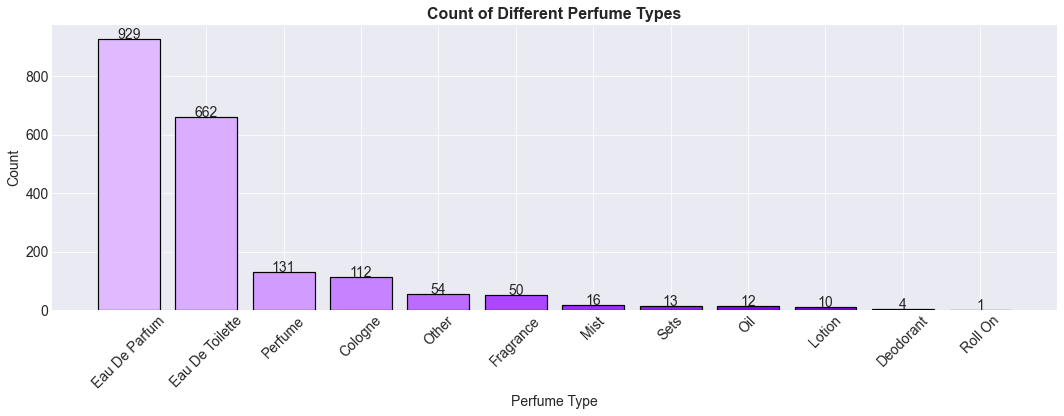

In [174]:
# What is the distribution of perfume types?
fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(x=perfumes_clean['perfumeType'].value_counts().index, height=perfumes_clean['perfumeType'].value_counts(), color=purple_colors[::-1], edgecolor='black', linewidth=1.2)
ax.tick_params(axis='x', rotation=45)
ax.set_title('Count of Different Perfume Types')
ax.set_xlabel('Perfume Type')
ax.set_ylabel('Count')
for i in perfumes_clean['perfumeType'].value_counts().index:
    ax.annotate(f'{perfumes_clean["perfumeType"].value_counts()[i]}', xy=(i, perfumes_clean["perfumeType"].value_counts()[i] + (.015 * ax.get_ylim()[1])), va='center', ha='center')
plt.tight_layout();

Two most frequent types of perfumes that show up on this ebay sample are Eau de Parfum and Eau de Toilette; most others are sparse.

#### What are the top ten most common brands?

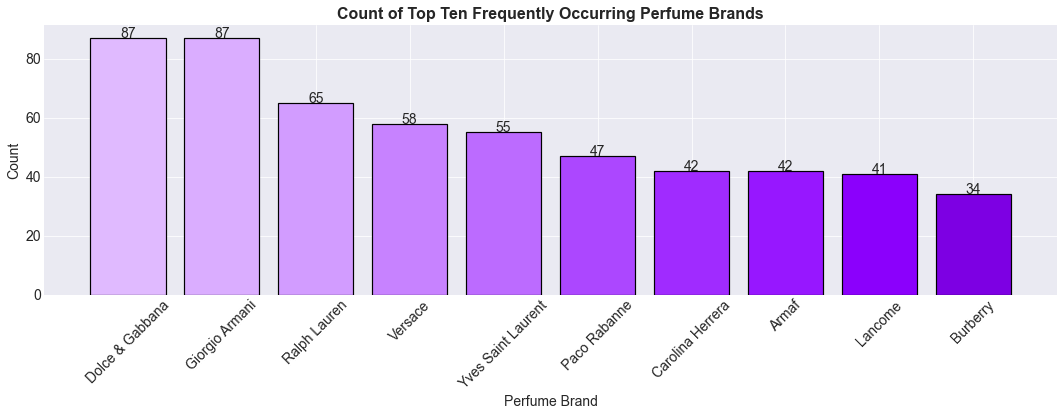

In [175]:
# What is the distribution of perfume types?
data = perfumes_clean.loc[perfumes_clean['brand'] != 'Unbranded', 'brand'].value_counts()

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(x=data.index[:10], height=data[:10], color=purple_colors[::-1], edgecolor='black', linewidth=1.2)
ax.tick_params(axis='x', rotation=45)
ax.set_title('Count of Top Ten Frequently Occurring Perfume Brands')
ax.set_xlabel('Perfume Brand')
ax.set_ylabel('Count')
for i in data.index:
    ax.annotate(f'{data[i]}', xy=(i, data[i] + (.015 * ax.get_ylim()[1])), va='center', ha='center')
plt.tight_layout();

The top 10 most common brands of perfumes listed in this sample of ebay are as illustrated above. Many are big name brands, with the top three most listed brands being Giorgio Armani, Dolce & Gabbana, and Ralph Lauren.

#### What is the distribution of perfumes intended for specific genders?

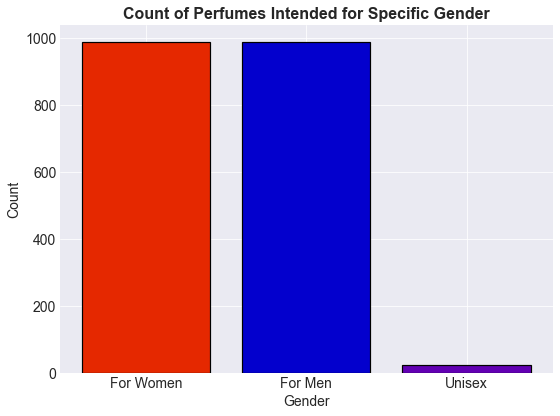

In [176]:
# What is the distribution of perfume types?
fig, ax = plt.subplots(figsize=(8, 6))

count_of_women = perfumes_clean['forWomen'].sum()
count_of_men = perfumes_clean['forMen'].sum()
count_of_unisex = perfumes_clean['unisex'].sum()

ax.bar(x=[1, 2, 3], height=[count_of_women, count_of_men, count_of_unisex], color=[red_colors[5], blue_colors[5], purple_colors[5]], edgecolor='black', linewidth=1.2)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['For Women', 'For Men', 'Unisex'])
ax.set_title('Count of Perfumes Intended for Specific Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
plt.tight_layout();

This is split very evenly down the middle, along with just a few perfumes intended for both genders.

#### Which locations do perfumes ship from most?

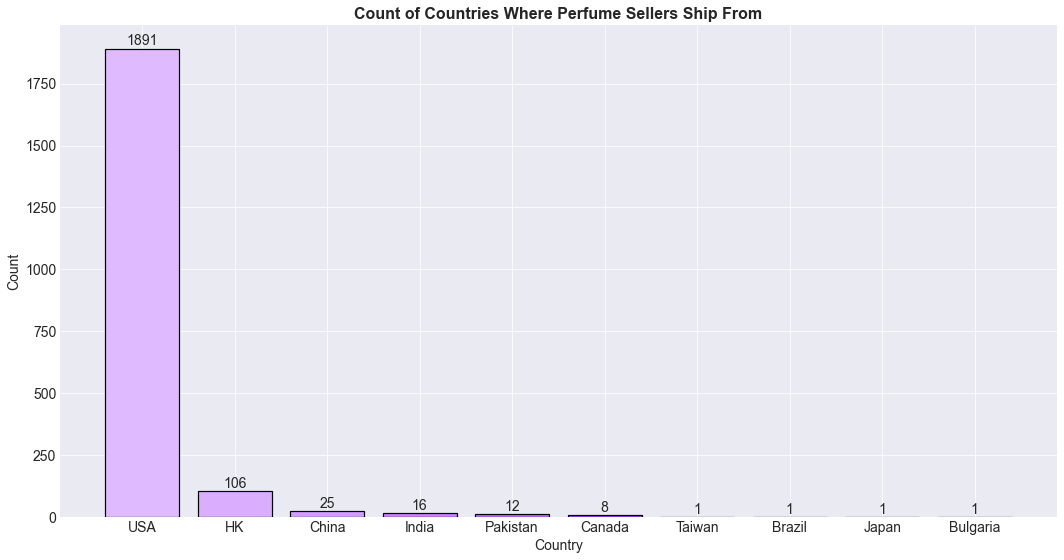

In [177]:
fig, ax = plt.subplots(figsize=(15, 8))
locations_count = perfumes_clean.loc[:, 'shipsFromUSA':].sum().sort_values(ascending=False)
plt.bar(x=locations_count.index, height=locations_count, color=purple_colors[::-1], edgecolor='black', linewidth=1.2)

for i in locations_count.index:
    ax.annotate(f'{locations_count[i]}', xy=(i, locations_count[i] + 30), va='center', ha='center')
ax.set_title('Count of Countries Where Perfume Sellers Ship From')
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_xticks(np.arange(len(location_categories)), labels=location_categories)
plt.tight_layout();

Practically all of the observations ship from the USA, and a considerably fewer number ship from Hong Kong.

#### Which brands have the highest average price?  Which types of perfumes have the highest average price?

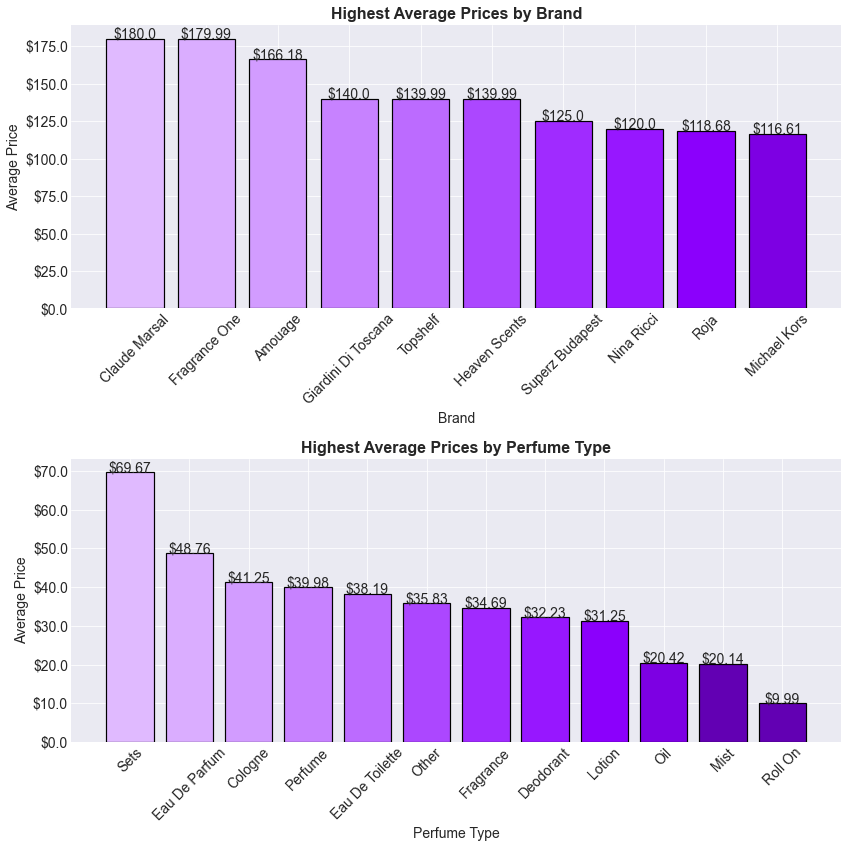

In [178]:
def find_aggregate_columns(df, gb_column, agg_func, agg_col):
    return df.groupby(gb_column)[agg_col].agg(agg_func).sort_values(ascending=False)

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

n = 0
for col, label in [('brand', 'Brand'), ('perfumeType', 'Perfume Type')]:
    if len(find_aggregate_columns(perfumes_clean, col, 'mean', 'price')) > 15:
        plot_func = find_aggregate_columns(perfumes_clean, col, 'mean', 'price')[:10]
    else:
        plot_func = find_aggregate_columns(perfumes_clean, col, 'mean', 'price')
    ax[n].bar(x=plot_func.index, height=plot_func, color=purple_colors[::-1], edgecolor='black', linewidth=1.2)
    ax[n].set_title(f'Highest Average Prices by {label}')
    ax[n].set_xlabel(f'{label}')
    ax[n].set_ylabel(f'Average Price')
    ax[n].tick_params(axis='x', rotation=45)
    for i in plot_func.index:
        ax[n].annotate(f'${plot_func[i].round(2)}', xy=(i, plot_func[i] + (.015 * ax[n].get_ylim()[1])), va='center', ha='center')
        ax[n].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y:}'))
    n += 1
plt.tight_layout();

It appears that the top 10 most expensive brands on average are fairly uncommon names. None of the brands in the plot of the different brand counts made it into the top 10.

For perfume Type, while sets of perfumes made up only 13 observations in the entire dataset, it is the most expensive type of perfume that consumers buy on average. This is followed by Eau de Parfum and cologne.

#### What are the highest selling brands and perfume types?

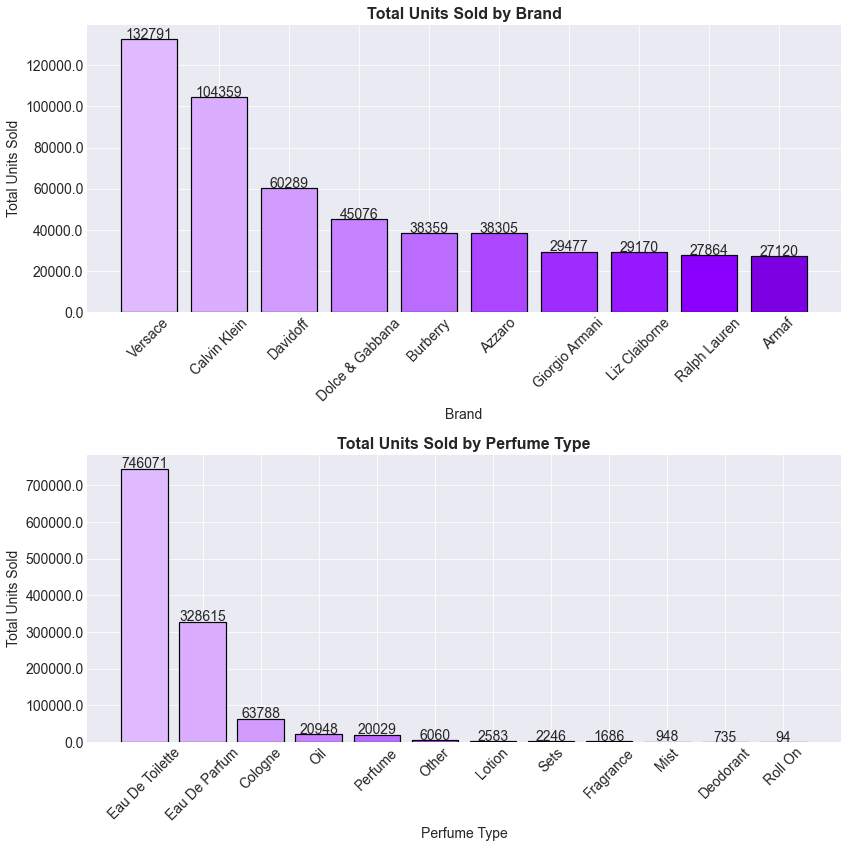

In [179]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

n = 0
for col, label in [('brand', 'Brand'), ('perfumeType', 'Perfume Type')]:
    if len(find_aggregate_columns(perfumes_clean, col, 'sum', 'sold')) > 15:
        plot_func = find_aggregate_columns(perfumes_clean, col, 'sum', 'sold')[:10]
    else:
        plot_func = find_aggregate_columns(perfumes_clean, col, 'sum', 'sold')
    ax[n].bar(x=plot_func.index, height=plot_func, color=purple_colors[::-1], edgecolor='black', linewidth=1.2)
    ax[n].set_title(f'Total Units Sold by {label}')
    ax[n].set_xlabel(f'{label}')
    ax[n].set_ylabel(f'Total Units Sold')
    ax[n].tick_params(axis='x', rotation=45)
    for i in plot_func.index:
        ax[n].annotate(f'{int(plot_func[i])}', xy=(i, plot_func[i]  + (.015 * ax[n].get_ylim()[1])), va='center', ha='center')
        ax[n].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:}'))
    n += 1
plt.tight_layout();

The highest selling brand is Versace and the highest selling type of perfume is Eau de Toilette. Eau De Parfum, while it has the highest average price, sells about half the units that Eau de Toilette sells.

#### Of the most expensive brands on average we found, what is the distribution of their prices?

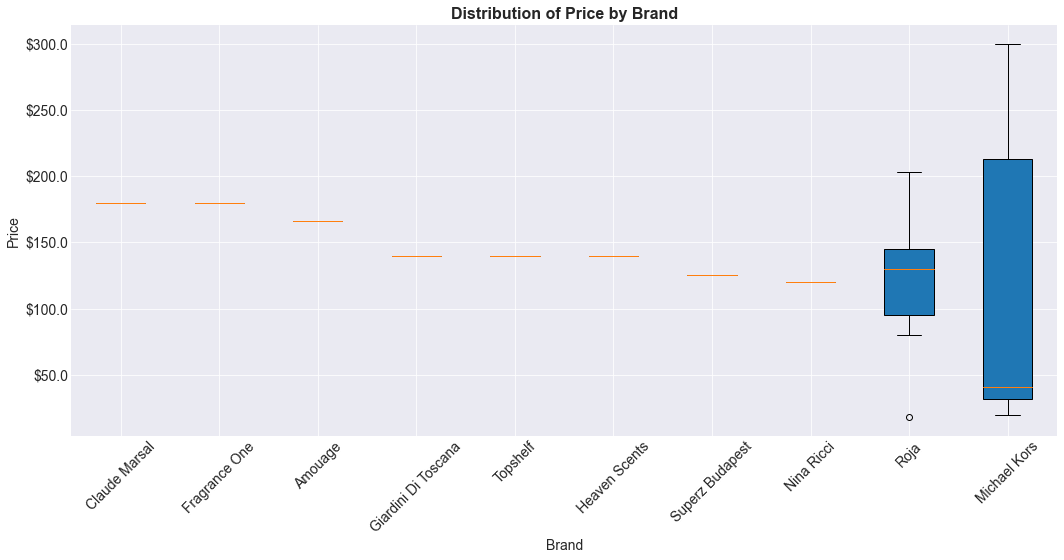

In [180]:
# What's the spread of the top brands' price?
top_brands = list(find_aggregate_columns(perfumes_clean, 'brand', 'mean', 'price').index[:10])
fig, ax = plt.subplots(figsize=(15, 8))
data = []
for brand in top_brands:
    data.append(perfumes_clean.loc[perfumes_clean['brand'].isin([brand])]['price'])

ax.boxplot(x=data, labels=top_brands, vert=True, patch_artist=True)
ax.tick_params(axis='x', rotation=45)
ax.set_title('Distribution of Price by Brand')
ax.set_xlabel('Brand')
ax.set_ylabel('Price')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y:}'))
plt.tight_layout();

There is very little variance for the majority of these brands, probably due to there being so few observations of each. However, the last two, Roja and Michael Kors, have much more variance. Michael Kors has a huge range of values, from less than $25 up to $300.

#### Of the different perfume types, what is the distribution of price? 

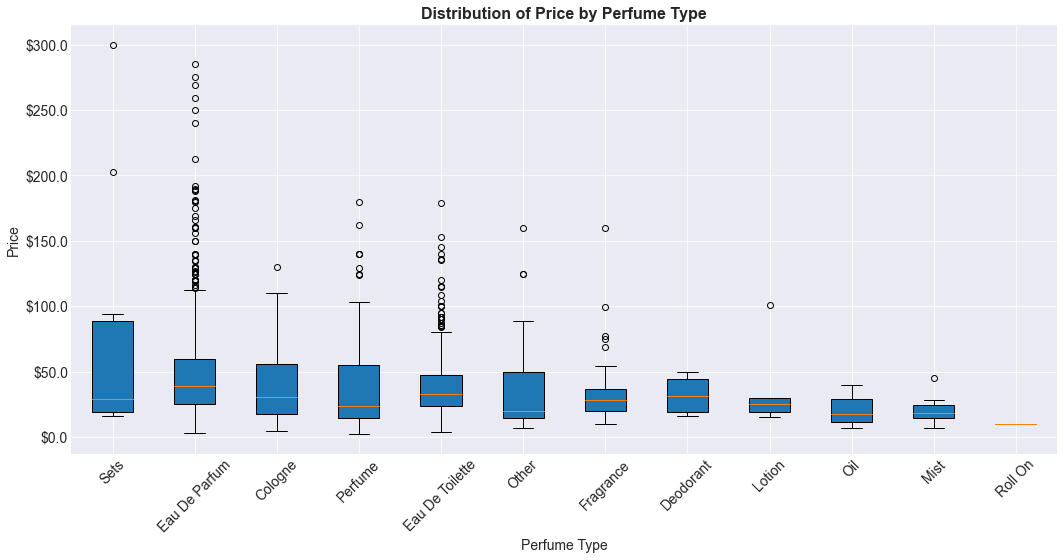

In [181]:
# What's the spread of the top types' price?
top_types = list(find_aggregate_columns(perfumes_clean, 'perfumeType', 'mean', 'price').index[:15])
fig, ax = plt.subplots(figsize=(15, 8))
data = []
for type in top_types:
    data.append(perfumes_clean.loc[perfumes_clean['perfumeType'].isin([type])]['price'])

ax.boxplot(x=data, labels=top_types, vert=True, patch_artist=True)
ax.tick_params(axis='x', rotation=45)
ax.set_title('Distribution of Price by Perfume Type')
ax.set_xlabel('Perfume Type')
ax.set_ylabel('Price')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y:}'))
plt.tight_layout();

Sets have a more limited range of prices than Eau de Parfum does, but the overall range is a tad higher than Eau de Parfum. Eau de Parfum has many, many outliers as seen by the circles on top of its box.

#### What about the highest average price of brands and perfume types across different genders?

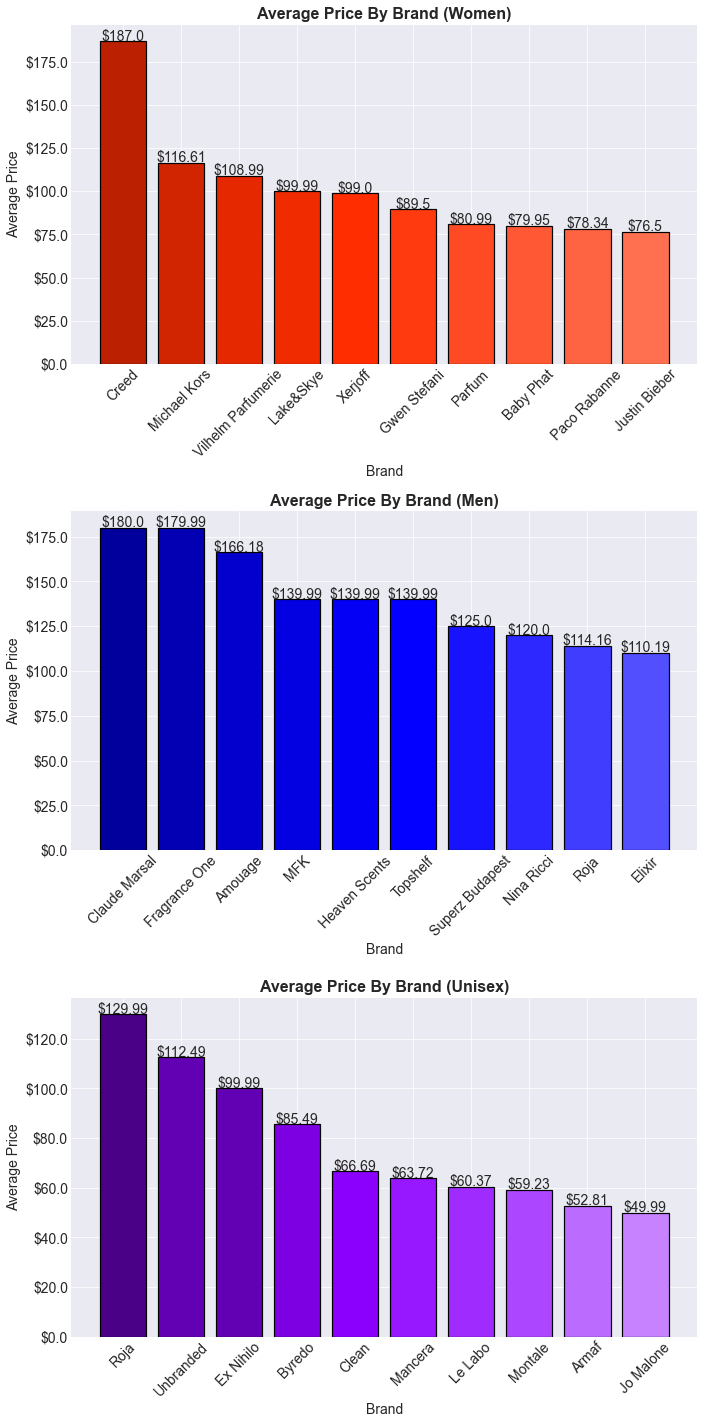

In [182]:
most_sold_brands_women = find_aggregate_columns(perfumes_clean.loc[(perfumes_clean['sold'] >= 0) & (perfumes_clean['forWomen'] == 1)], 'brand', 'mean', 'price')[:10]
most_sold_brands_men = find_aggregate_columns(perfumes_clean.loc[(perfumes_clean['sold'] >= 0) & (perfumes_clean['forMen'] == 1)], 'brand', 'mean', 'price')[:10]
most_sold_brands_unisex = find_aggregate_columns(perfumes_clean.loc[(perfumes_clean['sold'] >= 0) & (perfumes_clean['unisex'] == 1)], 'brand', 'mean', 'price')[:10]

fig, ax = plt.subplots(3, 1, figsize=(10, 20))
n = 0
for data, label, colors in [(most_sold_brands_women, 'Women', red_colors[3:]), (most_sold_brands_men, 'Men', blue_colors[3:]), (most_sold_brands_unisex, 'Unisex', purple_colors[3:])]:
    ax[n].bar(x=data.index, height=data, color=colors, edgecolor='black', linewidth=1.2)
    ax[n].set_title(f'Average Price By Brand ({label})')
    ax[n].set_xlabel('Brand')
    ax[n].set_ylabel('Average Price')
    ax[n].tick_params(axis='x', rotation=45)
    for i in data.index:
        ax[n].annotate(f'${data[i].round(2)}', xy=(i, data[i] + (.015 * ax[n].get_ylim()[1])), va='center', ha='center')
        ax[n].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y:}'))
    n += 1
plt.tight_layout();

The brands with the highest average price for women, men, and unisex are Creed, Claude Marsal, and Roja respectively.

#### What are the top selling brands of perfumes across genders?

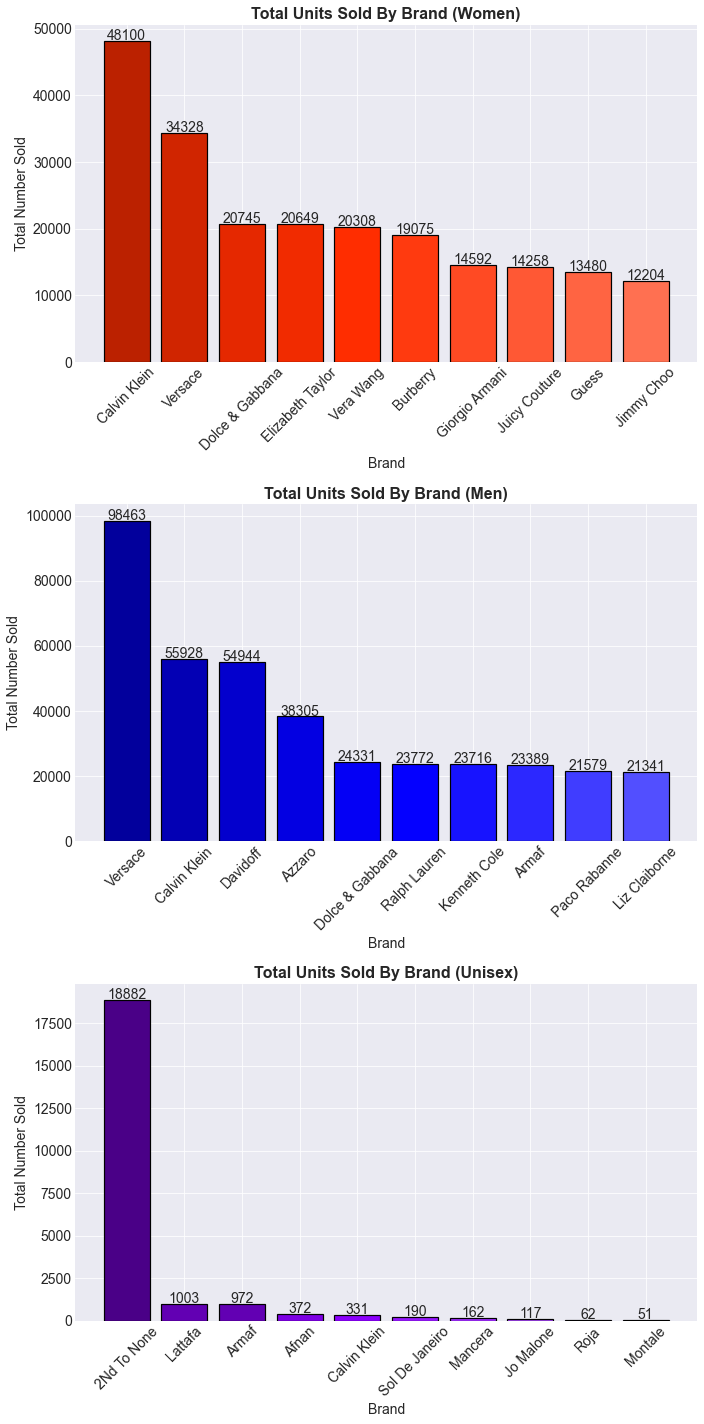

In [183]:
# What brands sell the most?
most_sold_brands_women = find_aggregate_columns(perfumes_clean.loc[(perfumes_clean['sold'] >= 0) & (perfumes_clean['forWomen'] == 1)], 'brand', 'sum', 'sold')[:10]
most_sold_brands_men = find_aggregate_columns(perfumes_clean.loc[(perfumes_clean['sold'] >= 0) & (perfumes_clean['forMen'] == 1)], 'brand', 'sum', 'sold')[:10]
most_sold_brands_unisex = find_aggregate_columns(perfumes_clean.loc[(perfumes_clean['sold'] >= 0) & (perfumes_clean['unisex'] == 1)], 'brand', 'sum', 'sold')[:10]

fig, ax = plt.subplots(3, 1, figsize=(10, 20))
n = 0
for data, label, colors in [(most_sold_brands_women, 'Women', red_colors[3:]), (most_sold_brands_men, 'Men', blue_colors[3:]), (most_sold_brands_unisex, 'Unisex', purple_colors[3:])]:
    ax[n].bar(x=data.index, height=data, color=colors, edgecolor='black', linewidth=1.2)
    ax[n].set_title(f'Total Units Sold By Brand ({label})')
    ax[n].set_xlabel('Brand')
    ax[n].set_ylabel('Total Number Sold')
    ax[n].tick_params(axis='x', rotation=45)
    for i in data.index:
        ax[n].annotate(f'{int(data[i])}', xy=(i, data[i] + (.015 * ax[n].get_ylim()[1])), va='center', ha='center')
    n += 1
plt.tight_layout();

Calvin Klein is included in all three of these categories, and Versace and Calvin Klein are in first and second places for both men and women. The unisex brands are very skewed, with the majority of units sold are by the brand 2nd to None.

#### What perfume types sell the most across genders?

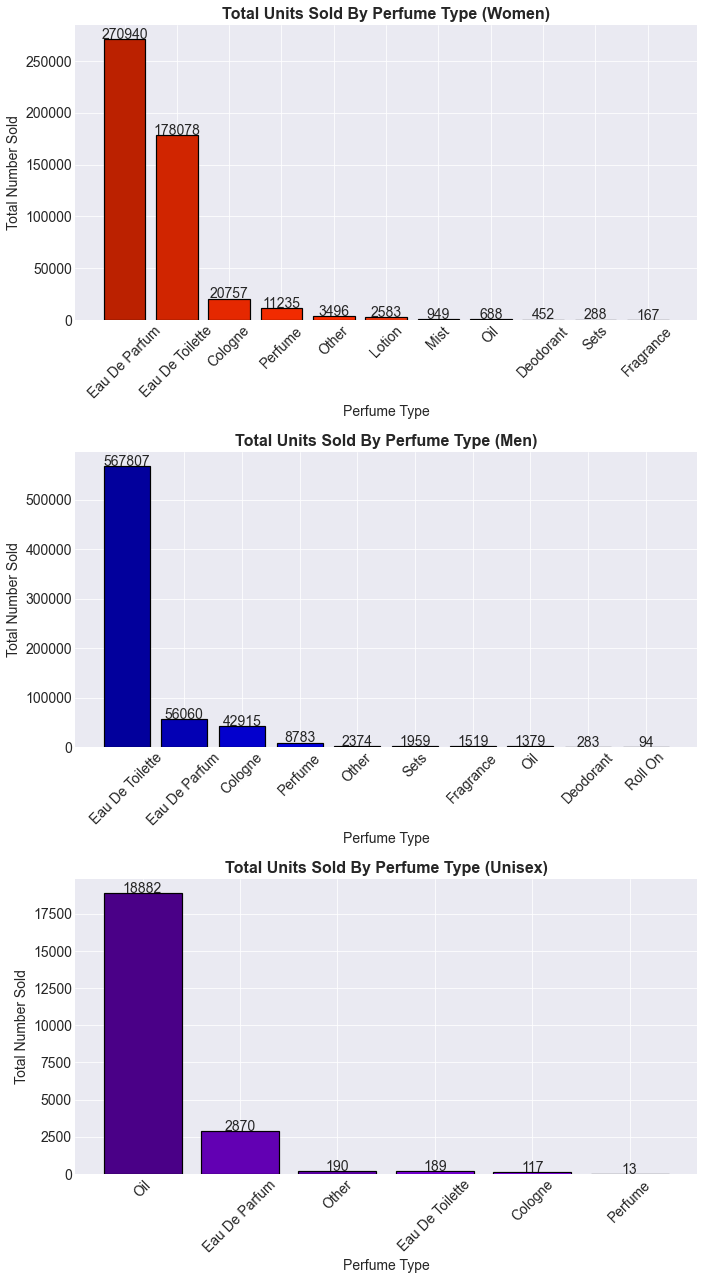

In [184]:
# What perfume types sell the most?
most_sold_brands_women = find_aggregate_columns(perfumes_clean.loc[(perfumes_clean['sold'] >= 0) & (perfumes_clean['forWomen'] == 1)], 'perfumeType', 'sum', 'sold')
most_sold_brands_men = find_aggregate_columns(perfumes_clean.loc[(perfumes_clean['sold'] >= 0) & (perfumes_clean['forMen'] == 1)], 'perfumeType', 'sum', 'sold')
most_sold_brands_unisex = find_aggregate_columns(perfumes_clean.loc[(perfumes_clean['sold'] >= 0) & (perfumes_clean['unisex'] == 1)], 'perfumeType', 'sum', 'sold')

fig, ax = plt.subplots(3, 1, figsize=(10, 18))
n = 0
for data, label, colors in [(most_sold_brands_women, 'Women', red_colors[3:]), (most_sold_brands_men, 'Men', blue_colors[3:]), (most_sold_brands_unisex, 'Unisex', purple_colors[3:])]:
    ax[n].bar(x=data.index, height=data, color=colors, edgecolor='black', linewidth=1.2)
    ax[n].set_title(f'Total Units Sold By Perfume Type ({label})')
    ax[n].set_xlabel('Perfume Type')
    ax[n].set_ylabel('Total Number Sold')
    ax[n].tick_params(axis='x', rotation=45)
    for i in data.index:
        ax[n].annotate(f'{int(data[i])}', xy=(i, data[i] + (.015 * ax[n].get_ylim()[1])), va='center', ha='center')
    n += 1
plt.tight_layout();

For perfume type intended for women, the most popular perfume type is Eau de Parfum, while for men, the most popular type is Eau de Toilette. Oil is the most popular type of perfume for the perfumes intended for both genders.

In [185]:
most_sold_brands_type_women = find_aggregate_columns(perfumes_clean.loc[(perfumes_clean['sold'] >= 0) & (perfumes_clean['forWomen'] == 1)], ['perfumeType', 'brand'], 'sum', 'sold')
most_sold_brands_type_men = find_aggregate_columns(perfumes_clean.loc[(perfumes_clean['sold'] >= 0) & (perfumes_clean['forMen'] == 1)], ['perfumeType', 'brand'], 'sum', 'sold')
most_sold_brands_type_unisex = find_aggregate_columns(perfumes_clean.loc[(perfumes_clean['sold'] >= 0) & (perfumes_clean['unisex'] == 1)], ['perfumeType', 'brand'], 'sum', 'sold')

## Key Takeaways:
- For perfume intended towards women, the top brand and top type to sell are Calvin Klein, and Eau de Parfum.
- For perfume intended towards men, the top brand and top type to sell are Versace, and Eau de Toilette.
- For perfume intended for both genders, the top brand and top type to sell are 2nd to None, and Oil.


#### Side note:
2nd to None is actually a seller on ebay, not a major perfume brand. Unless you would be able to buy wholesale from them and sell their products as a third party, they will be your biggest competition.

In [186]:
print(f"The optimal combination for mens perfume is: {most_sold_brands_type_men.index[0]}, it sold {(most_sold_brands_type_men[0])} units.")
print(f"The optimal combination for womens perfume is: {most_sold_brands_type_women.index[0]}, it sold {(most_sold_brands_type_women[0])} units.")
print(f"The optimal combination for unisex perfume is: {most_sold_brands_type_unisex.index[0]}, it sold {(most_sold_brands_type_unisex[0])} units.")

The optimal combination for mens perfume is: ('Eau De Toilette', 'Versace'), it sold 96089.0 units.
The optimal combination for womens perfume is: ('Eau De Parfum', 'Calvin Klein'), it sold 43892.0 units.
The optimal combination for unisex perfume is: ('Oil', '2Nd To None'), it sold 18882.0 units.


## Application of Bayes' Theorem
$$P(B|A) = \frac{P(A|B)P(B)}{P(A)}$$

#### Question: What is the probability that a perfume's type is Eau De Toilette given that the perfume is intended for men?
$$P(EDT|Men) = \frac{P(Men|EDT) * P(EDT)}{P(Men)}$$

In [187]:
EDT_MASK = (perfumes_clean['perfumeType'] == "Eau De Toilette")
MEN_MASK = (perfumes_clean['forMen'] == 1)

p_edt = len(perfumes_clean[EDT_MASK]) / len(perfumes_clean)

# forMen is 1 where the perfume is intended for men, and 0 otherwise, so this is essentially len(perfumes intended for men)
p_men_given_edt = perfumes_clean[EDT_MASK]['forMen'].sum() / len(perfumes_clean[EDT_MASK])
p_men = len(perfumes_clean[MEN_MASK]) / len(perfumes_clean)

p_edt_given_men = (p_edt * p_men_given_edt) / (p_men)
print(f"P(EDT|Men) = {p_edt_given_men}")

P(EDT|Men) = 0.46761133603238864


In [188]:
# Does this check out?
men = perfumes_clean[MEN_MASK]
men_props = men['perfumeType'].value_counts(normalize=True)
print(men_props.index[0], men_props[0])

Eau De Toilette 0.4676113360323887


## Inferential Analysis
Some additional questions have been added in this section to explore the inferential aspect of data analysis!

In [189]:
# Filter for perfumes that actually have their prices listed
PRICE_LISTED = perfumes_clean['price'] > 0

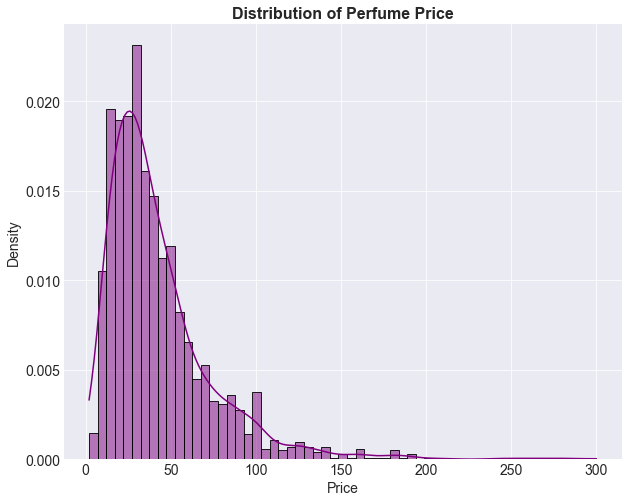

In [190]:
# A look at the distribution of the price variable
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(perfumes_clean.loc[PRICE_LISTED, 'price'], ax=ax, color="purple", kde=True, stat='density')
ax.set_title('Distribution of Perfume Price')
ax.set_xlabel('Price')
ax.set_ylabel('Density');

The distribution of perfume prices is right-skewed, and the majority of prices are found between 20 and 50 dollars.

Now let's visualize the distributions of price across the different genders.

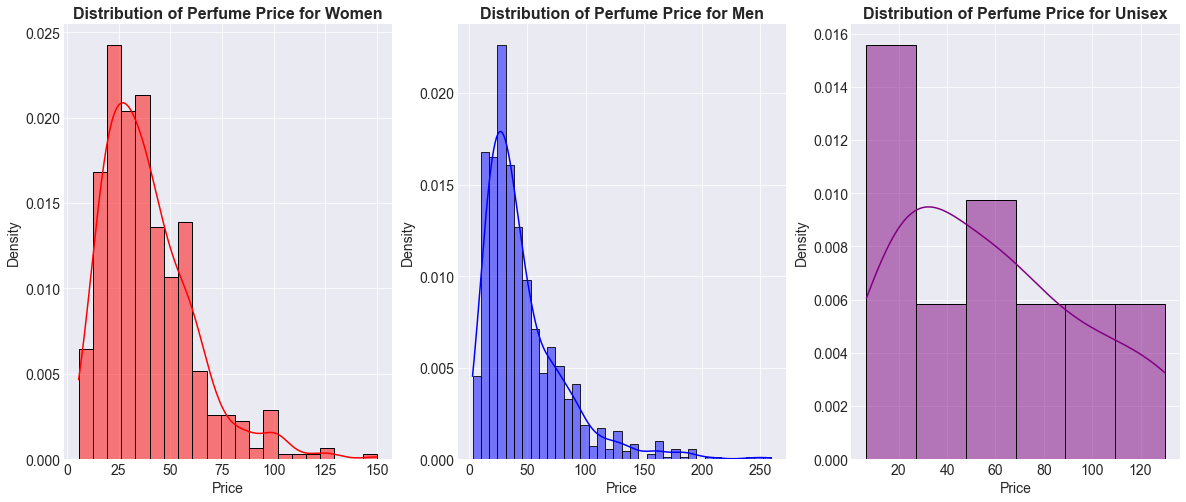

In [191]:
# A look at the distribution of the price variable across different genders
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.histplot(x=perfumes_clean.loc[WOMEN_MASK & PRICE_LISTED, 'price'], ax=ax[0], color="red", kde=True, stat='density')
sns.histplot(x=perfumes_clean.loc[MEN_MASK & PRICE_LISTED, 'price'], ax=ax[1], color="blue", kde=True, stat='density')
sns.histplot(x=perfumes_clean.loc[UNISEX_MASK & PRICE_LISTED, 'price'], ax=ax[2], color="purple", kde=True, stat='density')
for ax, label in [(ax[0], "Women"), (ax[1], "Men"), (ax[2], "Unisex")]:
    ax.set_title(f'Distribution of Perfume Price for {label}')
    ax.set_xlabel('Price')
    ax.set_ylabel('Density')

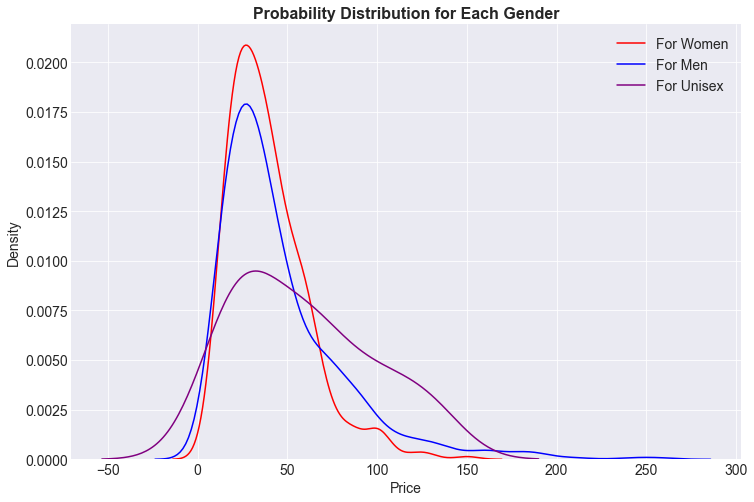

In [192]:
# Overlay the kernel density plot for each distribution onto one plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.kdeplot(perfumes_clean.loc[WOMEN_MASK & PRICE_LISTED, 'price'], ax=ax, color='red', label='For Women')
sns.kdeplot(perfumes_clean.loc[MEN_MASK & PRICE_LISTED, 'price'], ax=ax, color='blue', label='For Men')
sns.kdeplot(perfumes_clean.loc[UNISEX_MASK & PRICE_LISTED, 'price'], ax=ax, color='purple', label='For Unisex')
ax.set_title('Probability Distribution for Each Gender')
ax.set_xlabel('Price')
ax.legend();

#### Question: Is there a significant difference between prices of perfumes that target each gender?
To answer this question, we will perform a one way ANOVA test for signficance. But first, we must check the assumptions of the ANOVA test, which are:
1. Independence of variables
2. Normality
3. Homogeneity of variance

The first assumption is not violated since each of these groups is split into perfumes that target women exclusively, men exclusively, or both exclusively. None of these conditions can be true while the other two are true.

For checking the assumption of normality, we will use the Shapiro-Wilk test.

$H_0$: The distribution is approximately normal

$H_a$: The distribution is not approximately normal

In [193]:
for label, dist in [("women", perfumes_clean.loc[WOMEN_MASK & PRICE_LISTED, 'price']),
              ("men", perfumes_clean.loc[MEN_MASK & PRICE_LISTED, 'price']),
                ("unisex", perfumes_clean.loc[UNISEX_MASK & PRICE_LISTED, 'price'])]:
    _, p_val = stats.shapiro(dist)
    if p_val < 0.05:
        print(f"There is sufficient evidence to believe the distribution for {label} is not normal.")
    else:
        print("The distribution is normal.")

There is sufficient evidence to believe the distribution for women is not normal.
There is sufficient evidence to believe the distribution for men is not normal.
There is sufficient evidence to believe the distribution for unisex is not normal.


The normality assumption for all three distributions has been violated, and thus we cannot use the one-way ANOVA test to compare sample means. Instead, we must use a non-parametric test to compare these groups; specifically, the Kruskal-Wallis test.

##### Kruskal-Wallis Test
We want to perform this test with a 95% confidence level. Thus, $\alpha$ will be set to 0.05.

$H_0$: The median price of perfumes targeted for specific genders is the same.

$H_a$: The median price of perfumes targeted for specific genders is not the same.

In [194]:
alpha = 0.05
groups = [
    perfumes_clean.loc[WOMEN_MASK & PRICE_LISTED, 'price'],
    perfumes_clean.loc[MEN_MASK & PRICE_LISTED, 'price'],
    perfumes_clean.loc[UNISEX_MASK & PRICE_LISTED, 'price']
]

stat, p_val = stats.kruskal(groups[0], groups[1], groups[2])

if p_val < alpha:
    print(f"{p_val} < {alpha}")
    print("Reject the null hypothesis.")
else:
    print(f"{p_val} > {alpha}")
    print("Fail to reject the null hypothesis.")

0.03586330315458666 < 0.05
Reject the null hypothesis.


From the results of our test, the p-value obtained is less than the significance threshold of 0.05, which means there is sufficient evidence to reject the null hypothesis that the medians in price for women, men, and unisex targeted perfumes are the same. This indicates that there is at least one median that is statistically different from the other medians. Further analysis would have to be performed to figure out which one.

As an intuitive guess based on the plots, however, I believe it may be the distribution of perfumes targeting unisex.